In [1]:
%matplotlib notebook
import os
import importlib
import mozpy
import matplotlib.pyplot as plt

In [2]:
importlib.reload(mozpy);

In [3]:
%cat ./springmassdamper.moz

include GRAPHSIMCLI

def x1, x2, y, F, t: <Real>
def k, d, m: <Real>

def model = {
  param k 10.;
  param d 2.;
  param m 3.;

  F = -m * GRAVITATIONAL_CONSTANT;
  // F = sin(t);
  t' = 1.;

  x1' = x2;
  x2' = (-k / m) * x1 + (-d / m) * x2 + (F / m);
  y = x1;

  x1 <- 1.;
  y <- 1.;
  x2 <~ 0.;

  probe t;
  probe F;
  probe y
}

def main = (export2ModelicaCLI model)


In [4]:
# model = mozpy.Model("./springmassdamper.moz", "python ../../docker_moz.py")
model = mozpy.Model("./springmassdamper.moz")

In [5]:
model.elaborate().setParameters(d_1 = 2.5, k_1 = 14).simulate(t0=0, tf=20, h=0.01)

2019-10-15 20:07:48,114 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.oerikss.port.33444bb04c3e41448731a40377ff5bd3 pid=18431


In [6]:
model.getParameters()

{'d_1': 2.5, 'k_1': 14.0, 'm_1': 3.0}

In [7]:
model.getSolvedVariables()

('F_1', 'd_1', 'der(t_1)', 'k_1', 'm_1', 't_1', 'time', 'x1_1', 'y_1')

In [8]:
tt = model.getSolutions("t_1")

In [9]:
yy = model.getSolutions("y_1")

<IPython.core.display.Javascript object>


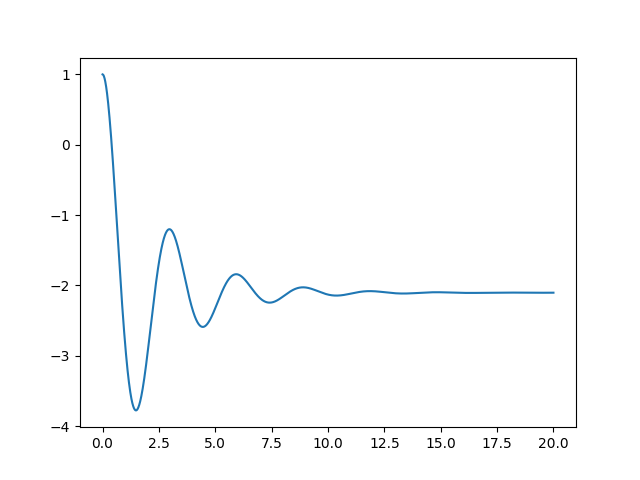

In [10]:
plt.plot(tt, yy)

In [11]:
model.getSolutions(["t_1", "y_1"])

array([[ 0.00000000e+00,  1.00000000e-02,  2.00000000e-02, ...,
         1.99900000e+01,  2.00000000e+01,  2.00000000e+01],
       [ 1.00000000e+00,  9.99278318e-01,  9.97121263e-01, ...,
        -2.10232061e+00, -2.10230424e+00, -2.10230424e+00]])